# Practical One: Image Basics

This notebook is prepared to introduce you to the basics of image reading, processing, displaying, and writing in Python. Note that there are several Python libraries that we can use for image input/output and representation. However we are particularly interested in Pillow's [Python Imaging Library (PIL)](https://pillow.readthedocs.io/en/stable/#pillow) library, `Image` class to be specific. Please visit [here](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html) for a tutorial on PIL's `Image` class.

### References
* [Homework 0: Fun with Color!](https://github.com/pjreddie/vision-hw0)
* [A. R. Smith, “Color gamut transform pairs,” ACM SIGGRAPH Computer Graphics, vol. 12, no. 3. Association for Computing Machinery (ACM), pp. 12–19, Aug. 23, 1978. doi: 10.1145/965139.807361.](http://alvyray.com/Papers/CG/color78.pdf)

## Image Loading

To load an image from a file, use the `Image.open()` function of the `Image` module. For instance, the following code snippet loads the image from the file `../data/dog.jpg` and returns an `Image` object in `im`.

In [27]:
from PIL import Image
from IPython.display import display
im = Image.open('../data/dog.jpg')

We can now use instance attributes to examine the file contents:

In [32]:
#*get the image formate, width, height and mode 
output = (
    f'image format : {im.format}\n'
    f'image mode   : {im.mode}\n'
    f'image width  : {im.width}\n'
    f'image height : {im.height}'
)
print(output)

image format : JPEG
image mode   : RGB
image width  : 768
image height : 576


## Image Displaying

To display the image `im` that we just loaded, we can simply call the method `im.show()` for a window display or simply type `im` or `display(im)` for inline display:

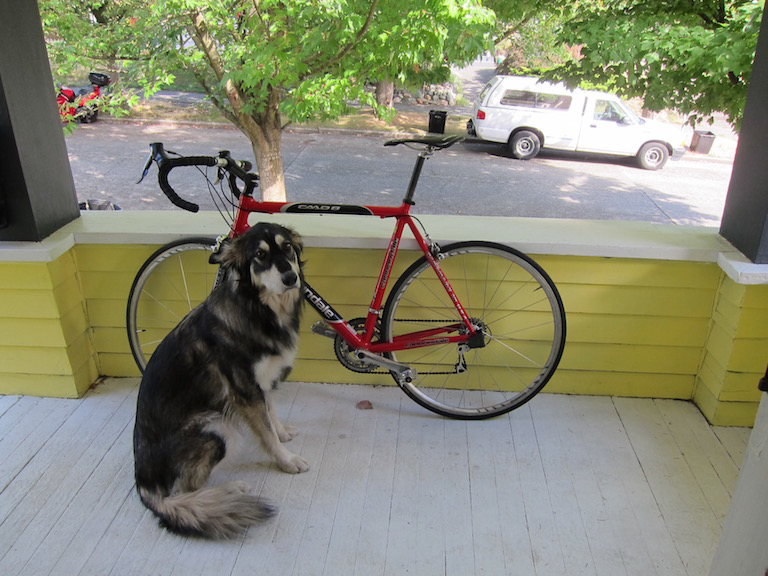

In [3]:
# im.show()
display(im)

## Image Saving

To save the image object `im` to the file `../figs/dog.png`, use the method `im.save('../figs/dog.png')`:

In [4]:
im.save('../figs/dogdog.png')

You will realize that although we did not provide the format of the image file explicitly, it was automatically inferred from the file name extension (i.e.,`.png`).

## Getting and Setting Pixels

The most basic operation we want to do is change the pixels in an image. As we talked about in class, we represent an image as a 3 dimensional tensor. We have spatial information as well as multiple channels which combine together to form a color image:

![RGB format](../figs/rgb.png)

The convention is that the coordinate system starts at the top left of the image, like so:

![Image coordinate system](../figs/coords.png)

We can use `im.getpixel((x,y))` method to get the pixel value at the position `(x,y)` as a 3-tuple for the color image `im`:

In [5]:
x, y = 0, 0
p = im.getpixel((x,y))
print('p = {}'.format(p))
str = 'im({:d},{:d},0) = {:d}\n'.format(x,y,p[0])
str+= 'im({:d},{:d},1) = {:d}\n'.format(x,y,p[1])
str+= 'im({:d},{:d},2) = {:d}'.format(x,y,p[2])
print(str)

p = (57, 58, 50)
im(0,0,0) = 57
im(0,0,1) = 58
im(0,0,2) = 50


The above code snippet returns the pixel value at column `x` and row `y` as a 3-tuple `p`. Note that `p[0]`, `p[1]`, and `p[2]` hold the pixel values for red, green, and blue channels, respectively. 

Similarly, we can use `im.putpixel((x,y), p)` method to set the pixel value at the position `(x,y)` to a 3-tuple `p` for the color image `im`:

In [6]:
x, y = 0, 0
p = im.getpixel((x,y))
p = (0, p[1], p[2])
im.putpixel((x,y), p)
print('p = {}'.format(p))
str = 'im({:d},{:d},0) = {:d}\n'.format(x,y,im.getpixel((x,y))[0])
str+= 'im({:d},{:d},1) = {:d}\n'.format(x,y,im.getpixel((x,y))[1])
str+= 'im({:d},{:d},2) = {:d}'.format(x,y,im.getpixel((x,y))[2])
print(str)

p = (0, 58, 50)
im(0,0,0) = 0
im(0,0,1) = 58
im(0,0,2) = 50


The above code snippet sets the pixel value at column `x` and row `y` to a 3-tuple `p`. Note that `p[0]`, `p[1]`, and `p[2]` hold the pixel values for red, green, and blue channels, respectively.

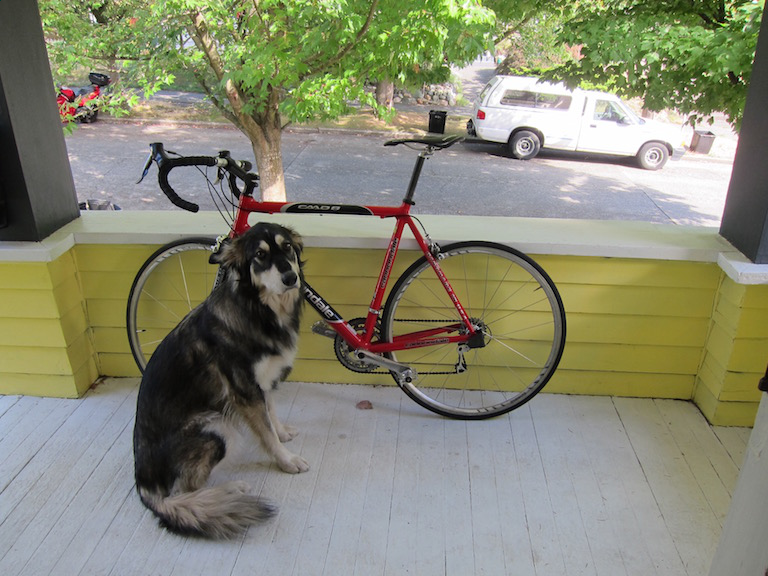

In [7]:
display(im)

We can now manipulate pixel values of the entire image with two nested loops. For instance, the following code snippet creates a copy of the image `im` and removes (sets to zero) all of the red channel:

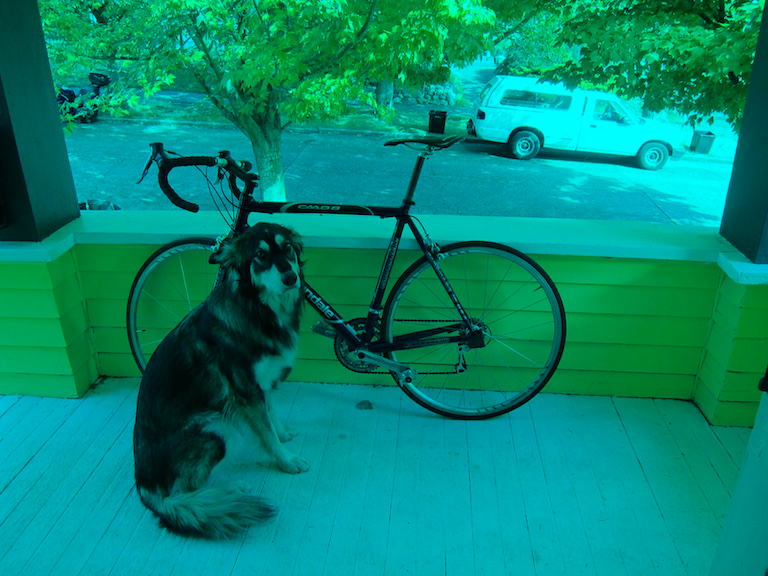

In [8]:
im_temp = im.copy()

for x in range(im_temp.width):
    for y in range(im_temp.height):
        p = im_temp.getpixel((x,y))
        p = (0, p[1], p[2])
        im_temp.putpixel((x,y), p)

display(im_temp)

### What does the following code snippet do?

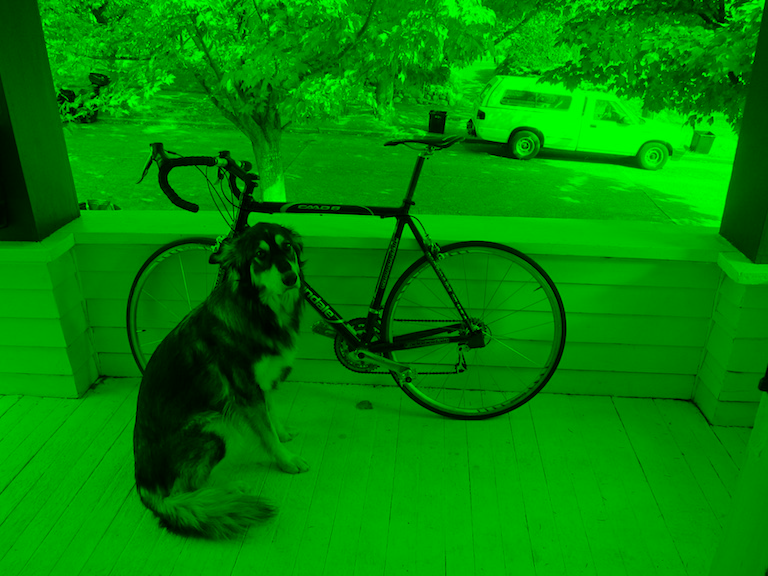

In [9]:
im_temp = im.copy()

for x in range(im_temp.width):
    for y in range(im_temp.height):
        p = im_temp.getpixel((x,y))
        p = (0, p[1], 0)
        im_temp.putpixel((x,y), p)

display(im_temp)

### What does the following code snippet do?

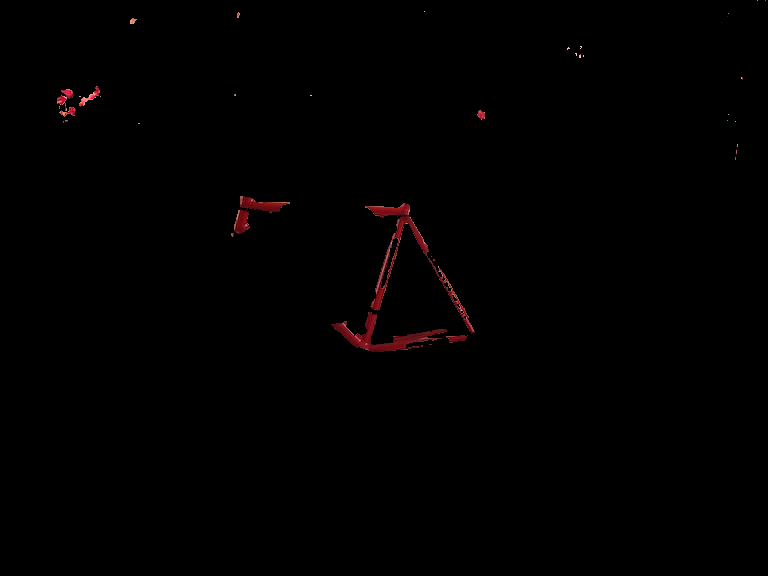

In [10]:
im_temp = im.copy()

for x in range(im_temp.width):
    for y in range(im_temp.height):
        p = im_temp.getpixel((x,y))
        if ((p[0]-p[1]) > 50) and ((p[0] - p[2]) > 50):
            p = (p[0], p[1], p[2])
        else:
            p = (0, 0, 0)
        im_temp.putpixel((x,y), p)

display(im_temp)

## Color to Grayscale Image Conversion

We can convert a color image to a grayscale image in several ways. Remember how humans don't see all colors equally? Here's the chart to remind you:

![Eye sensitivity to different wavelengths](../figs/sensitivity.png)

This actually makes a huge difference in practice. Here's a colorbar we may want to convert:

![Color bar](../data/colorbar.png)

If we convert it using an equally weighted mean K = (R+G+B)/3 we get a conversion that doesn't match our perceptions of the given colors:

![Averaging grayscale](../figs/avggray.png)

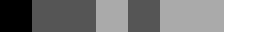

In [11]:
im = Image.open('../data/colorbar.png')
im_temp = Image.new('L',im.size)
for x in range(im_temp.width):
    for y in range(im_temp.height):
        p = im.getpixel((x,y))
        v = int((p[0] + p[1] + p[2]) / 3.0)
        im_temp.putpixel((x,y), v)

im_temp.save('../figs/avggray.png')
display(im_temp)

Instead we are going to use a weighted sum. Now, there are a few ways to do this. If we wanted the most accurate conversion it would take a fair amount of work. sRGB uses [gamma compression][1] so we would first want to convert the color to linear RGB and then calculate [relative luminance](https://en.wikipedia.org/wiki/Relative_luminance).

But we don't care about being too accurate so we'll just do the quick and easy version instead. Video engineers use a calculation called [luma][2] to find an approximation of perceptual intensity when encoding video signal, we'll use that to convert our image to grayscale. It operates directly on the gamma compressed sRGB values that we already have! We simply perform a weighted sum:

    Y' = 0.299 * R' + 0.587 * G' + 0.114 * B'

Using this conversion technique we get a pretty good grayscale image:

![Grayscale colorbars](../figs/weightedgray.png)

[1]: https://en.wikipedia.org/wiki/SRGB#The_sRGB_transfer_function_("gamma")
[2]: https://en.wikipedia.org/wiki/Luma_(video)

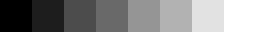

In [12]:
im = Image.open('../data/colorbar.png')
im_temp = Image.new('L',im.size)
for x in range(im_temp.width):
    for y in range(im_temp.height):
        p = im.getpixel((x,y))
        v = int(0.299 * p[0] + 0.587 * p[1] + 0.114 * p[2])
        im_temp.putpixel((x,y), v)

im_temp.save('../figs/weightedgray.png')
display(im_temp)

## RGB to Hue, Saturation, Value

So far we've been focussing on RGB and grayscale images. But there are other colorspaces out there too we may want to play around with. Like [Hue, Saturation, and Value (HSV)](https://en.wikipedia.org/wiki/HSL_and_HSV). We will be translating the cubical colorspace of sRGB to the cylinder of hue, saturation, and value:

![RGB HSV conversion](../figs/convert.png)

[Hue](https://en.wikipedia.org/wiki/Hue) can be thought of as the base color of a pixel. [Saturation](https://en.wikipedia.org/wiki/Colorfulness#Saturation) is the intensity of the color compared to white (the least saturated color). The [Value](https://en.wikipedia.org/wiki/Lightness) is the perception of brightness of a pixel compared to black. You can try out this [demo](http://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) to get a better feel for the differences between these two colorspaces. For a geometric interpretation of what this transformation:

![RGB to HSV geometry](../figs/rgbtohsv.png)

Now, to be sure, there are [lots of issues](http://poynton.ca/notes/colour_and_gamma/ColorFAQ.html#RTFToC36) with this colorspace. But it's still fun to play around with and relatively easy to implement. The easiest component to calculate is the Value, it's just the largest of the 3 RGB components when R, G, and B, each on domain [0,1]:

    V = max(R,G,B)

Next we can calculate Saturation. This is a measure of how much color is in the pixel compared to neutral white/gray. Neutral colors have the same amount of each three color components, so to calculate saturation we see how far the color is from being even across each component. First we find the minimum value

    m = min(R,G,B)

Then we see how far apart the min and max are:

    C = V - m

and the Saturation will be the ratio between the difference and how large the max is:

    S = C / V

Except if R, G, and B are all 0. Because then V would be 0 and we don't want to divide by that, so just set the saturation 0 if that's the case.

Finally, to calculate Hue we want to calculate how far around the color hexagon our target color is.

![color hex](../figs/hex.png)

We start counting at Red. Each step to a point on the hexagon counts as 1 unit distance. The distance between points is given by the relative ratios of the secondary colors. We can use the following formula from [Wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV#Hue_and_chroma):

<img src="../figs/eq.svg" width="256">

There is no "correct" Hue if C = 0 because all of the channels are equal so the color is a shade of gray, right in the center of the cylinder. However, for now let's just set H = 0 if C = 0 because then your implementation will match mine.

Notice that we are going to have H = \[0,1) and it should circle around if it gets too large or goes negative. Thus we check to see if it is negative and add one if it is. This is slightly different than other methods where H is between 0 and 6 or 0 and 360. We will store the H, S, and V components in the same image, so simply replace the R channel with H, the G channel with S, etc.

In [13]:
import numpy as np

In [14]:
def rgb2hsv(RGB):
    '''
    Performs RGB to HSV conversion on the input Image object RGB and
    returns HSV representation as a numpy array.
    Uses "A. R. Smith, “Color gamut transform pairs,” 
    ACM SIGGRAPH Computer Graphics, vol. 12, no. 3. Association for Computing Machinery (ACM), 
    pp. 12-19, Aug. 23, 1978. doi: 10.1145/965139.807361."
    '''
    RGB = np.array(RGB).astype(float) / 255.0
    HSV = np.zeros(RGB.shape)
    for y in range(RGB.shape[0]):
        for x in range(RGB.shape[1]):
            R, G, B = RGB[y,x,:]
            V = np.max((R, G, B))
            m = np.min((R, G, B))
            C = V - m
            if V == 0.0:
                S = 0.0
            else:
                S = C / V
                
            if C == 0.0:
                H = 0.0
            else:
                if V == R:
                    H_prime = (G-B) / C
                elif V == G:
                    H_prime = (B-R) / C + 2
                elif V == B:
                    H_prime = (R-G) / V + 4
                
                if H_prime < 0:
                    H = H_prime / 6 + 1
                else:
                    H = H_prime / 6
            
            HSV[y,x,0] = H
            HSV[y,x,1] = S
            HSV[y,x,2] = V
    
    return HSV

In [15]:
im = Image.open('../data/dog.jpg')
hsv = rgb2hsv(im)

Now, let's display HSV channels for the dog image.

In [16]:
H = Image.fromarray((hsv[:,:,0] * 255).astype(np.uint8))
S = Image.fromarray((hsv[:,:,1] * 255).astype(np.uint8))
V = Image.fromarray((hsv[:,:,2] * 255).astype(np.uint8))

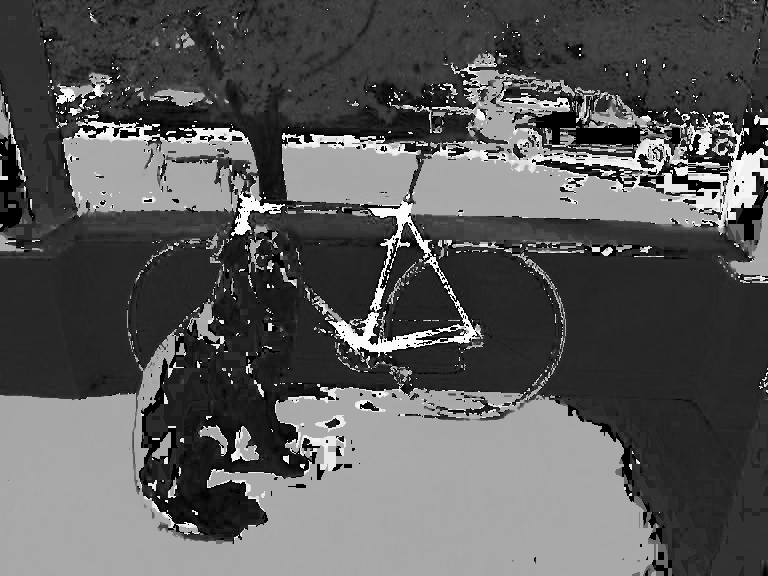

In [17]:
display(H)

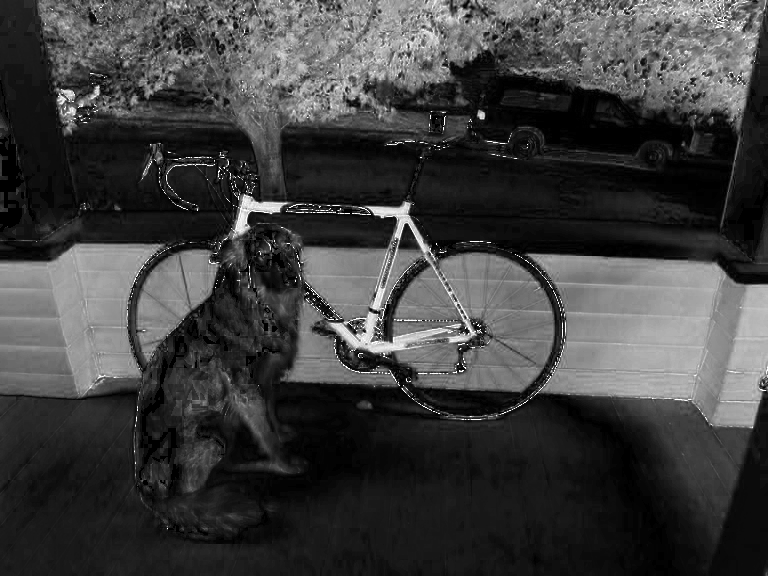

In [18]:
display(S)

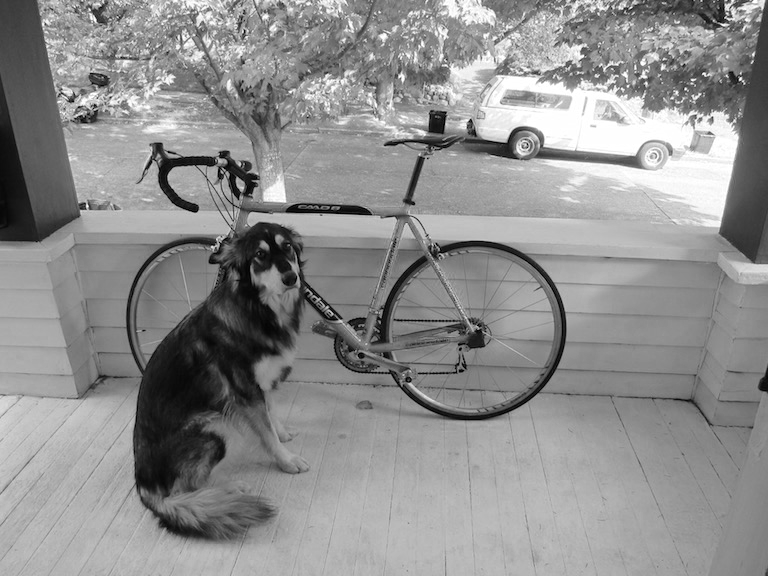

In [19]:
display(V)

# Your Task [100 Marks]

Now you are expected to implement the function `hsv2rgb` to convert from the input HSV array to RGB image representation.

In [20]:
def hsv2rgb(HSV):
    '''
    Performs HSV to RGB conversion on the input HSV array and
    returns RGB representation as an Image object.
    Implements according to "A. R. Smith, “Color gamut transform pairs,” 
    ACM SIGGRAPH Computer Graphics, vol. 12, no. 3. Association for Computing Machinery (ACM), 
    pp. 12-19, Aug. 23, 1978. doi: 10.1145/965139.807361."
    '''
    pass

Note that if your implementation of `hsv2rgb` is correct, then the following code snipped should generate an output image which is almost identical with the input image. Note that, the outputs generated below works only if your implementation of `hsv2rgb` is correct, otherwise you will not be able to see the results below once you run the scripts in the following cells.

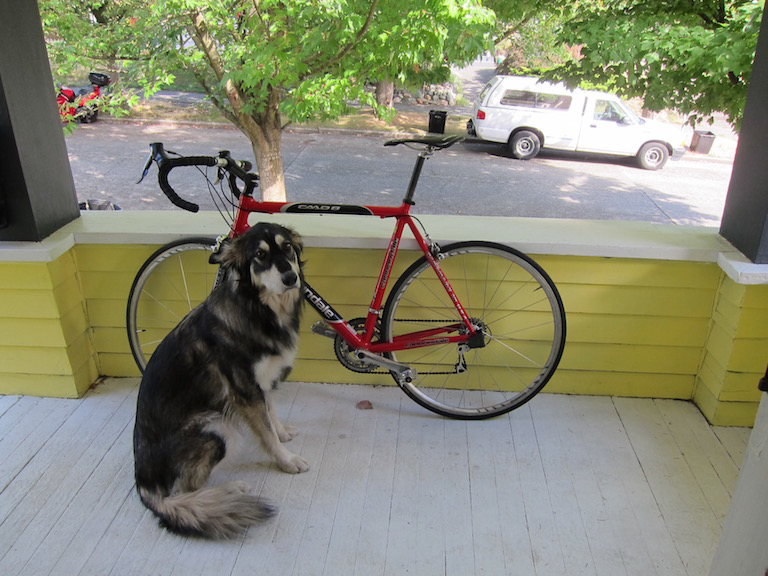

None

In [21]:
im = Image.open('../data/dog.jpg')
display(im)
hsv = rgb2hsv(im)
rgb = hsv2rgb(hsv)
display(rgb)

Now, we can load an image in RGB color space, transform it to HSV color space, apply some arbitrary operations on HSV color space, and finally transform back to RGB color space to visualize the impact of those arbitrary operations.

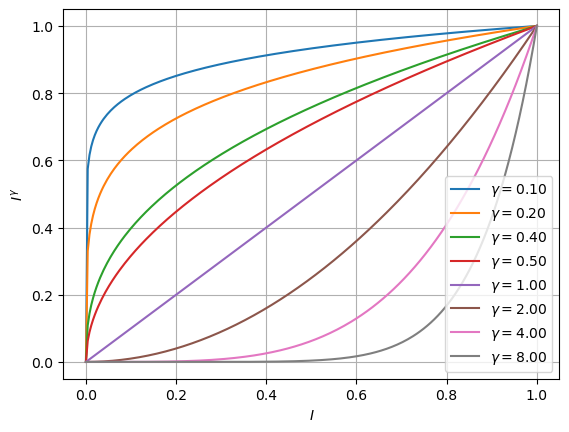

In [22]:
import matplotlib.pyplot as pl
I = np.linspace(0, 1.0, 256)
gamma = [0.1, 0.2, 0.4, 0.5, 1, 2, 4, 8]
for g in gamma:
    pl.plot(I, I**g, label='$\gamma = {:.2f}$'.format(g))
pl.xlabel('$I$')
pl.ylabel('$I^{\gamma}$')
pl.grid(True)
pl.legend()

In [23]:
hsv_temp = hsv.copy()
gamma = 0.5
hsv_temp[...,1] = hsv_temp[...,1]**gamma
rgb_temp = hsv2rgb(hsv_temp)
display(rgb_temp)

None

In [24]:
hsv_temp = hsv.copy()
gamma = 2
hsv_temp[...,2] = hsv_temp[...,2]**gamma
rgb_temp = hsv2rgb(hsv_temp)
display(rgb_temp)

None

In [25]:
hsv_temp = hsv.copy()
temp = hsv_temp[...,0]
temp = temp + 0.5
temp[temp > 1.0] = temp[temp > 1.0] - 1.0
hsv_temp[...,0] = temp
rgb_temp = hsv2rgb(hsv_temp)
display(rgb_temp)

None

In [26]:
hsv_temp = hsv.copy()
hsv_temp[...,1] = 0.75
hsv_temp[...,2] = 0.75
rgb_temp = hsv2rgb(hsv_temp)
display(rgb_temp)

None

# Submission

Complete the tasks, save and run all of your notebook, zip your entire folder `Practical One` and submit it on Canvas under Assignment 1.